In [21]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
cars = pd.read_csv('../saudi-arabia-used-cars-dataset/UsedCarsSA_Clean_EN.csv')
cars.drop_duplicates(inplace=True)
cars = cars[cars['Price'] != 0]
cars = cars[cars['Price'] > 7000]

Text(0, 0.5, 'Cars')

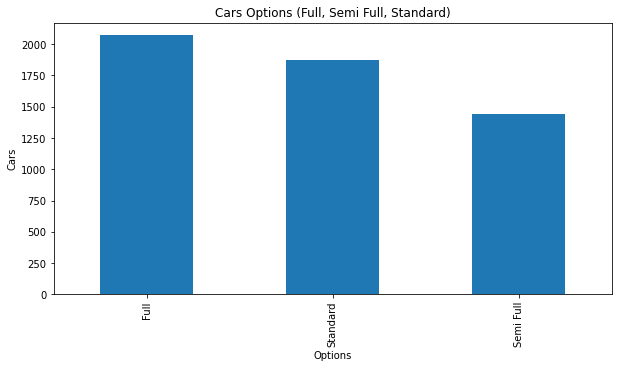

In [7]:
fig = plt.figure(figsize=(10,5))
cars.Options.value_counts().plot(kind='bar', rot=90)
plt.title('Cars Options (Full, Semi Full, Standard)')
plt.xlabel('Options')
plt.ylabel('Cars')

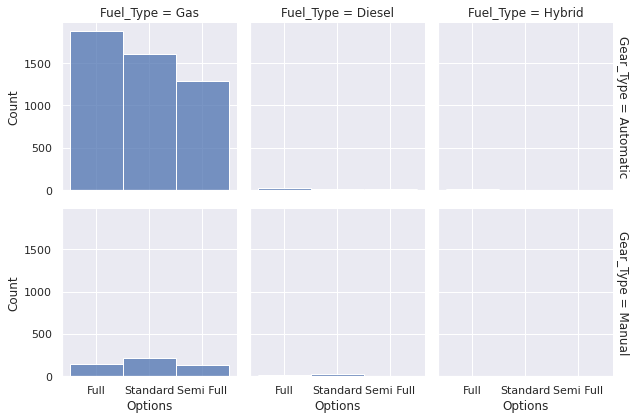

In [31]:
sns.set_theme(style="darkgrid")
sns.displot(
    cars, x="Options", col="Fuel_Type",  row="Gear_Type",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

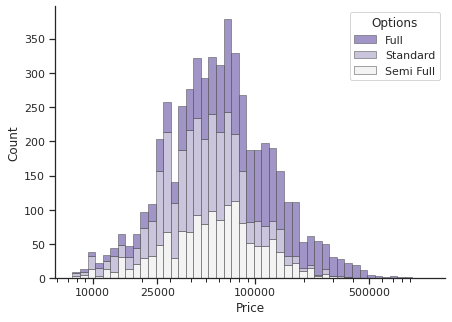

In [29]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    cars,
    x="Price", hue="Options",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([10000, 25000, 100000, 500000])

Insights:
- Semi full option cars are the least sold cars, while most of the sold cars are full option, in general.
- As the price increases, the sold cars are more likely to be full option.

In [43]:
cars_t = cars.loc[(cars['Make'] == 'Toyota') & (cars['Year'] > 1999)]
cars_t

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
6,Toyota,Land Cruiser,2011,Saudi,White,Semi Full,4.5,Gas,Automatic,183000,Riyadh,92000,False
9,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,131000,Jeddah,32000,False
10,Toyota,Camry,2017,Gulf Arabic,White,Standard,2.5,Gas,Automatic,107000,Dammam,50000,False
15,Toyota,Corolla,2018,Saudi,White,Standard,1.6,Gas,Automatic,7702,Dammam,45000,False
20,Toyota,Prado,2021,Saudi,White,Semi Full,4.0,Gas,Automatic,3000,Dammam,174000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7981,Toyota,Rav4,2011,Saudi,Another Color,Semi Full,1.4,Gas,Manual,135000,Riyadh,25000,False
7988,Toyota,Avalon,2016,Saudi,White,Semi Full,3.5,Gas,Automatic,86000,Jeddah,87000,False
8010,Toyota,Furniture,2012,Saudi,Black,Semi Full,2.0,Gas,Automatic,202245,Riyadh,41000,False
8014,Toyota,Camry,2017,Saudi,Silver,Standard,2.5,Gas,Automatic,314000,Dammam,46000,False


<AxesSubplot:xlabel='Year', ylabel='Price'>

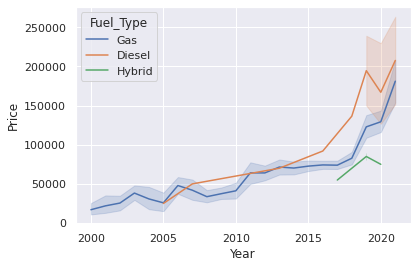

In [44]:

sns.set_theme(style="darkgrid")


# Plot the responses for different events and regions
sns.lineplot(x="Year", y="Price",
             hue="Fuel_Type", 
             data=cars_t)

Insights:
- As an example, we took the sample of Toyota cars (as Toyota has the higher frequency) from 2000 onward. We see that Diesel used cars had lower prices in 2005, but with the time it got higher than Gas used cars. Moreover, note the behavior of the Hybrid used cars.